#EECS 442 PS1: Filtering

__Please provide the following information__
(e.g. Andrew Owens, ahowens):

[Your first name] [Your last name], [Your UMich uniqname]

__Important__: after you download the .ipynb file, please name it as __\<your_uniquename\>_\<your_umid\>.ipynb__ before you submit it to canvas. Example: adam_01101100.ipynb.




# Introduction

We'll provide you with starter code, like this, in a Jupyter notebook for most problem sets. Please fill in the code to complete the assignment, and submit your notebook to Canvas as a .ipynb file. You can, of course, initially write your code offline in an editor like Emacs or Vim -- we'd just like the final output to be in a notebook format to make grading more consistent.

Please note that *we won't run your code*. The notebook you submit should already contain all of the results we ask for. In particular, the visualizations of edge responses and blurred images should be computed *before you submit*. If you'd like to preview what your notebook will look like when we grade it, follow the directions [here](https://stackoverflow.com/questions/15998491/how-to-convert-ipython-notebooks-to-pdf-and-html) for converting the .ipynb notebook into an HTML file.


# Starting

Run the following code to import the modules you'll need, and to download the images.

In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import urllib.request

# Download the images that you'll need
base_url = 'https://web.eecs.umich.edu/~ahowens/eecs442/fa20/psets/ps1/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())



# Problem 1.2: Pet edge detection (a)

<ipython-input-2-99a30ec43e8d>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('dog-1.jpg')


(265, 400, 3)
106000
[[ 0.  0.  0.]
 [-1.  1.  0.]
 [ 0.  0.  0.]]
[[ 0. -1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]


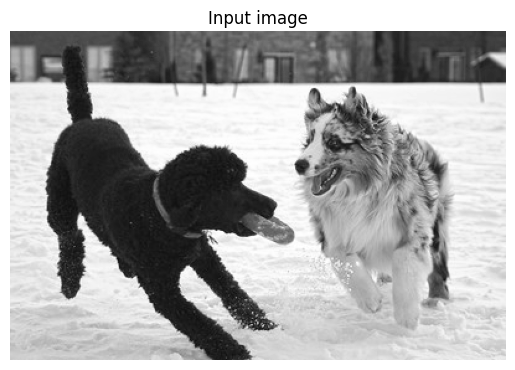

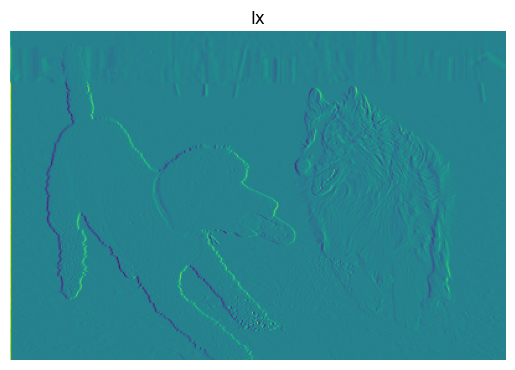

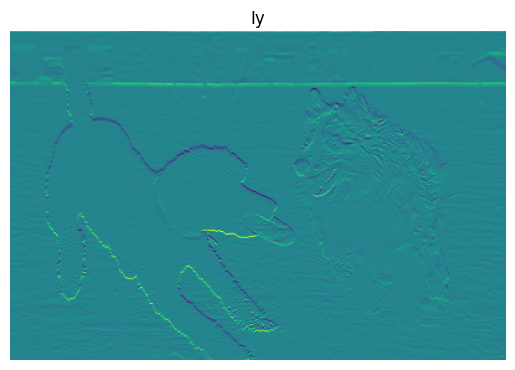

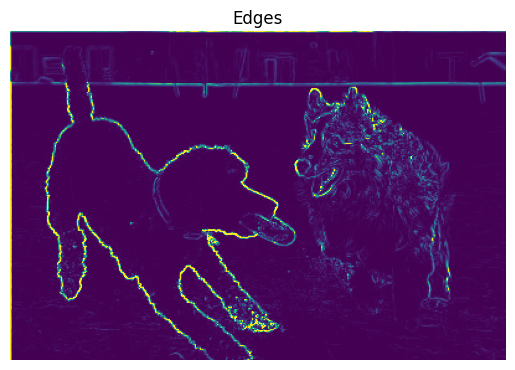

In [2]:
# You can upload images yourself or load them from URLs
im = imageio.imread('dog-1.jpg')
print(im.shape)
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255.
print(im.size)

# Your code here!
# def convolve(im, h):
#   h=np.flip(h, axis=1)
#   h=np.flip(h,axis=0)
#   print(h)
#   cx = np.floor((h.shape[1]-1)/2).astype(int)
#   cy = np.floor((h.shape[0]-1)/2).astype(int)
#   returnImg = np.zeros(im.shape)

#   for m in range(im.shape[0]):
#     for n in range(im.shape[1]):
#       for k in range(h.shape[0]):
#         for l in range(h.shape[1]):
#           targetRow=m+(k-cy)
#           targetColumn=n+(l-cx)
#           if (targetRow<0 or targetRow>im.shape[0]-1):
#             continue
#           if (targetColumn<0 or targetColumn>im.shape[1]-1):
#             continue
#           returnImg[m,n]+=im[targetRow][targetColumn]*h[k][l]
#   return returnImg
# dx=np.array([[1, -1]])
# dy=np.array([[1], [-1]])
######################### Solution code #########################
# input have the same size with the output, use zero paddings
def convolve(im, h):
  h = h[::-1, ::-1]
  print(h)
  r = np.zeros_like(im)

  for i in range(im.shape[0]):
    for j in range(im.shape[1]):
      for ii in range(h.shape[0]):
        for jj in range(h.shape[1]):
          n = h.shape[0]//2
          iii = i - n + ii
          jjj = j - n + jj
          if 0 <= iii < im.shape[0] and 0 <= jjj < im.shape[1]:
            r[i, j] += im[iii, jjj] * h[ii, jj]
  return r

# choice of horizontal and vertical filters
dx = np.array([[0., 0., 0.], [0., 1., -1.], [0., 0., 0.]])
dy = dx.T

######################### End solution code #########################

# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix)

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy)

plt.figure()
plt.title('Edges')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))

# Problem 1.2: Pet edge detection (c)

Please visualize the images and edges with matplotlib, using code similar to what we provided in (a).

In [ ]:
dx

array([[ 0.,  0.,  0.],
       [ 0.,  1., -1.],
       [ 0.,  0.,  0.]])

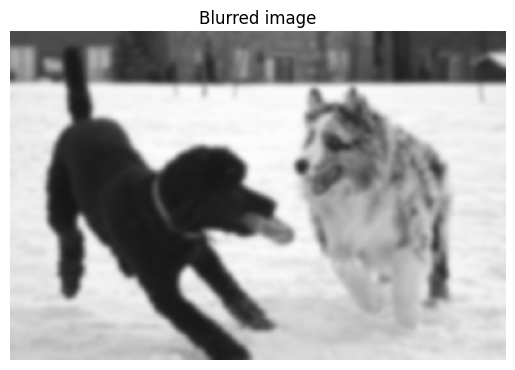

In [3]:
d = 11
m = d // 2.
s = 2.
i = np.arange(d)
G = (i[:, None] - m)**2 + (i[None, :] - m)**2
G = np.exp(-G / (2*s**2))
G /= G.sum()
#print(G)

im_blur = scipy.ndimage.convolve(im, G)
plt.figure()
plt.title('Blurred image')
plt.axis('off')
plt.imshow(im_blur, cmap = 'gray', vmin = 0, vmax = 1)


<ipython-input-4-1b8ee4bdd16f>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('dog-2.jpg').mean(2)/255.


[[7.76553851e-05 2.39195426e-04 5.73799997e-04 1.07199952e-03
  1.55975010e-03 1.76742842e-03 1.55975010e-03 1.07199952e-03
  5.73799997e-04 2.39195426e-04 7.76553851e-05]
 [2.39195426e-04 7.36773780e-04 1.76742842e-03 3.30199100e-03
  4.80436855e-03 5.44406279e-03 4.80436855e-03 3.30199100e-03
  1.76742842e-03 7.36773780e-04 2.39195426e-04]
 [5.73799997e-04 1.76742842e-03 4.23984037e-03 7.92106463e-03
  1.15250810e-02 1.30596277e-02 1.15250810e-02 7.92106463e-03
  4.23984037e-03 1.76742842e-03 5.73799997e-04]
 [1.07199952e-03 3.30199100e-03 7.92106463e-03 1.47984970e-02
  2.15316860e-02 2.43985967e-02 2.15316860e-02 1.47984970e-02
  7.92106463e-03 3.30199100e-03 1.07199952e-03]
 [1.55975010e-03 4.80436855e-03 1.15250810e-02 2.15316860e-02
  3.13284183e-02 3.54997488e-02 3.13284183e-02 2.15316860e-02
  1.15250810e-02 4.80436855e-03 1.55975010e-03]
 [1.76742842e-03 5.44406279e-03 1.30596277e-02 2.43985967e-02
  3.54997488e-02 4.02264854e-02 3.54997488e-02 2.43985967e-02
  1.30596277e-02

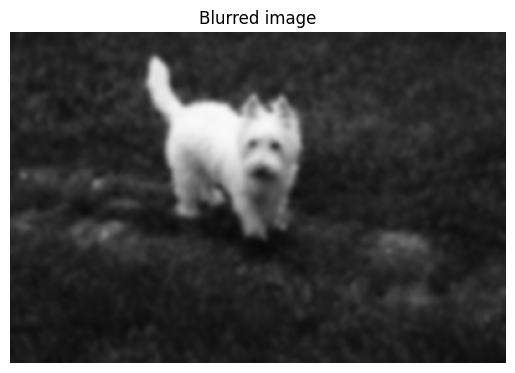

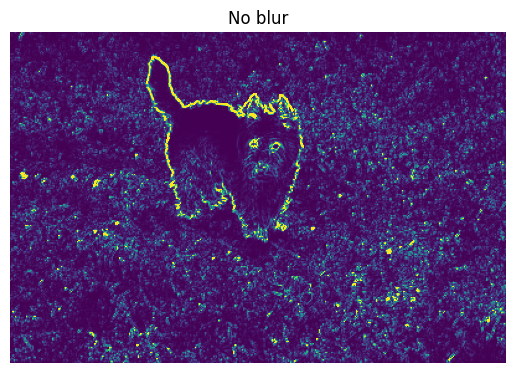

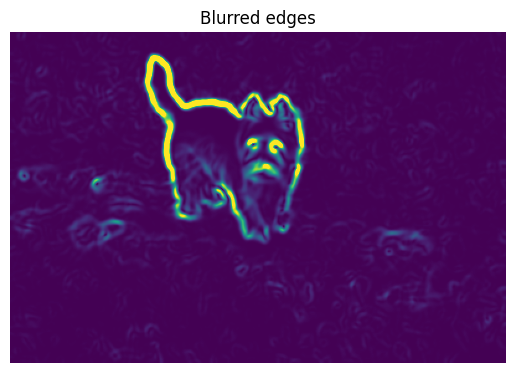

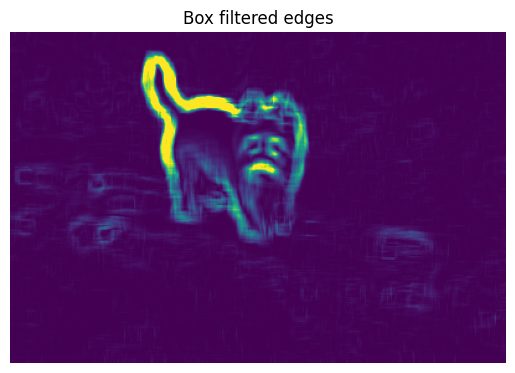

In [ ]:
im = imageio.imread('dog-2.jpg').mean(2)/255.

######################### Solution code #########################
d = 11
m = d // 2.
s = 2.
i = np.arange(d)
G = (i[:, None] - m)**2 + (i[None, :] - m)**2
G = np.exp(-G / (2*s**2))
G /= G.sum()
print(G)

im_blur = scipy.ndimage.convolve(im, G)
plt.figure()
plt.title('Blurred image')
plt.axis('off')
plt.imshow(im_blur, cmap = 'gray', vmin = 0, vmax = 1)

def edge(im):
  Ix = scipy.ndimage.convolve(im, dx)
  Iy = scipy.ndimage.convolve(im, dy)
  return Ix**2. + Iy**2.

plt.figure()
plt.title('No blur')
plt.axis('off')
edges = edge(im)
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))

plt.figure()
plt.title('Blurred edges')
plt.axis('off')
edges = edge(im_blur)
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))

plt.figure()
plt.title('Box filtered edges')
plt.axis('off')
im_box = scipy.ndimage.convolve(im, np.ones((d, d))/d**2.)
edges = edge(im_box)
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))
######################### End solution code #########################


# Problem 1.2: Pet edge detection (d)

Please use the visualization code to display the filter you construct.

1.0565159858089146e-12
0.0005892069382576981


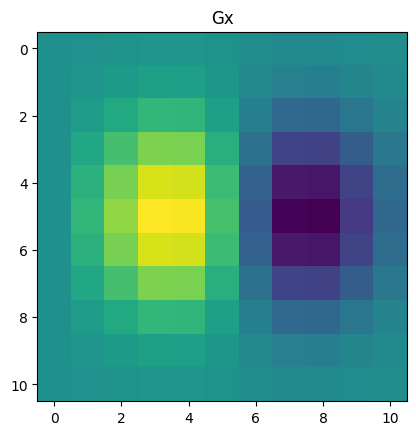

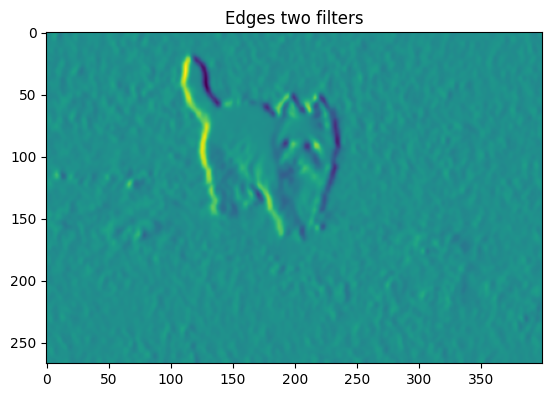

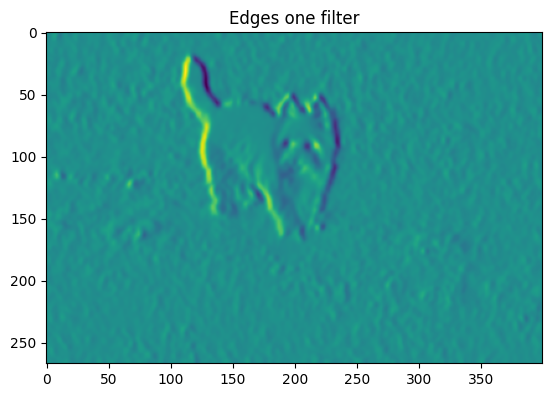

In [ ]:
# Your code here
######################### Solution code #########################
# convolution is associative!
Gx = scipy.ndimage.convolve(G, dx)

######################### End solution code #########################

plt.figure()
plt.title('Gx')
plt.imshow(Gx)

plt.figure()
plt.title('Edges two filters')
Ix = scipy.ndimage.convolve(im_blur, dx)
plt.imshow(Ix)

plt.figure()
plt.title('Edges one filter')
plt.imshow(scipy.ndimage.convolve(im, Gx))

2
## Note to graders: Please ignore any printed values and consider only visualizations for grading.

print(np.abs(np.sum(im_blur - im)))

print(np.abs(scipy.ndimage.convolve(im_blur, dx)[15:-15,15:-15] - scipy.ndimage.convolve(im, Gx)[15:-15,15:-15]).mean())

# Problem 1.2 Pet edge detection (e)
Please visualize the results using matplotlib.

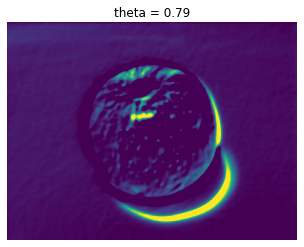

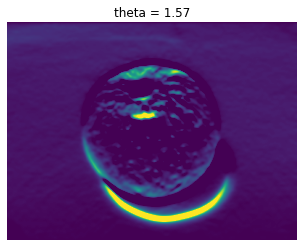

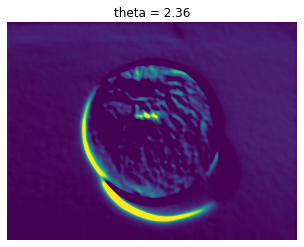

In [ ]:
im = imageio.imread('apple.jpg').mean(2)/255.

######################### Solution code #########################
# Your code here

# return the image gradient steered at angle theta !!!
def oriented_grad(Ix, Iy, theta):
  return np.cos(theta)*Ix + np.sin(theta)*Iy

im_blur = scipy.ndimage.convolve(im, G)
Ix = scipy.ndimage.convolve(im_blur, dx)
Iy = scipy.ndimage.convolve(im_blur, dy)

for theta in [np.pi/4, np.pi/2, 3*np.pi/4]:
  edges = oriented_grad(Ix, Iy, theta)
  plt.figure()
  plt.title('theta = %.2f' % theta)
  plt.axis('off')
  plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))
######################### End solution code #########################
